# The easiest assignment in this course

Cope one of these notebooks (`Linear SoftMax Classifier.ipynb`, `Polynomial SoftMax Classifier.ipynb`) and replace the model with multilayer neural network. Play with nonlinearities, also generate your own, more entangled data and check your models perfrmance. Good luck!

In [1]:
#Data Init
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output
import tensorflow as tf

N = 1000 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

<Figure size 1000x800 with 1 Axes>

In [2]:
nh1 = 10
nh2 = 6

In [3]:
t_x = tf.placeholder(tf.float32, shape=[None, D])
t_y = tf.placeholder(tf.int32, shape = [None])

In [4]:
#init weights
w1 = tf.Variable(tf.random_normal([D, nh1]))
w2 = tf.Variable(tf.random_normal([nh1, nh2]))
w0 = tf.Variable(tf.random_normal([nh2, K]))

#init biases
b1 = tf.Variable(tf.zeros([1, nh1], dtype=tf.float32))
b2 = tf.Variable(tf.zeros([1, nh2], dtype=tf.float32))
b0 = tf.Variable(tf.zeros([1, K], dtype=tf.float32))

In [5]:
#layers
h1 = tf.matmul(t_x, w1) + b1
layer1 = tf.nn.relu(h1)
h2 = tf.matmul(layer1, w2) + b2
layer2 = tf.nn.relu(h2)
h0 = tf.matmul(layer2, w0) + b0

In [6]:
# some hyperparameters
step_size = 0.01
reg = 1e-3 # regularization strength

t_scores = h0
t_prediction = tf.argmax(t_scores, axis=-1, output_type=tf.int32)
t_acc = tf.reduce_mean(tf.cast(tf.equal(t_prediction, t_y), tf.float32))
t_loss_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=t_y, logits=t_scores)
t_loss = tf.reduce_mean(t_loss_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate=step_size)

train_op = optimizer.minimize(t_loss)

In [7]:
if "sess" in dir():
    sess.close()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

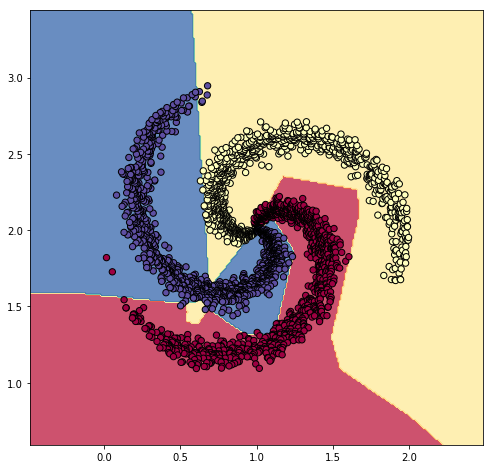

In [8]:
for i in range(2000):
    loss, acc, _ = sess.run([t_loss, t_acc, train_op], feed_dict={t_x:X, t_y:y})
#     time.sleep(0.1)
    
    if i % 2 == 0:
        print("iteration %d:\tloss %f\tacc %f" % (i, loss, acc))
        clear_output(wait=True)
        plot(h=0.01)

In [9]:
# evaluate training set accuracy
print('training accuracy: %.2f%%' % 
      (100*sess.run(t_acc, feed_dict={t_x:X, t_y:y})))

training accuracy: 95.87%


Then write the same model in <b>Keras.

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

y_e = to_categorical(y)

model = tf.keras.Sequential()
model.add(layers.Dense(nh1, activation='relu', input_dim=2))
model.add(layers.Dense(nh2, activation='relu'))
model.add(layers.Dense(K, activation='softmax'))

In [11]:
model.compile(optimizer= 'adam', 
              loss= tf.keras.losses.binary_crossentropy, 
              metrics=['accuracy'])

In [12]:
model.fit(X, y_e, epochs=1000)

Epoch 1/1000
3000/3000 [==============================] - 1s 194us/step - loss: 0.6521 - acc: 0.6560
Epoch 2/1000
3000/3000 [==============================] - 0s 49us/step - loss: 0.6371 - acc: 0.6667
Epoch 3/1000
3000/3000 [==============================] - 0s 63us/step - loss: 0.6290 - acc: 0.6667
Epoch 4/1000
3000/3000 [==============================] - 0s 57us/step - loss: 0.6213 - acc: 0.6667
Epoch 5/1000
3000/3000 [==============================] - 0s 54us/step - loss: 0.6115 - acc: 0.6667
Epoch 6/1000
3000/3000 [==============================] - 0s 54us/step - loss: 0.5886 - acc: 0.6718
Epoch 7/1000
3000/3000 [==============================] - 0s 57us/step - loss: 0.5679 - acc: 0.6980
Epoch 8/1000
3000/3000 [==============================] - 0s 51us/step - loss: 0.5481 - acc: 0.7030
Epoch 9/1000
3000/3000 [==============================] - 0s 56us/step - loss: 0.5314 - acc: 0.7386
Epoch 10/1000
3000/3000 [==============================] - 0s 57us/step - loss: 0.5167 - acc: 0.764

In [13]:
result = []
predictions = model.predict(X)
for pred in predictions:
    result.append(np.argmax(pred))

In [14]:
result = np.array(result)

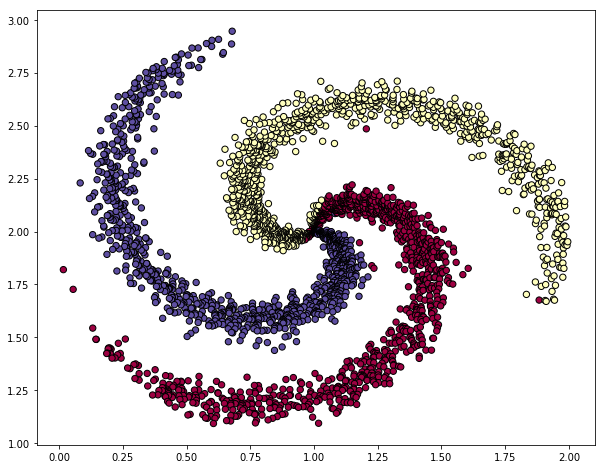

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=result, s=40, cmap=plt.cm.Spectral, edgecolors="black")